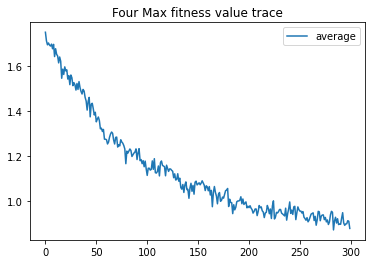

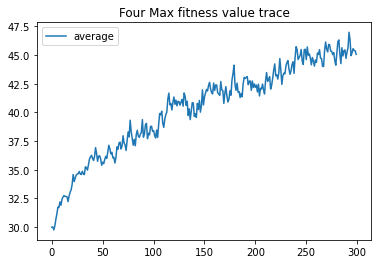

[16. 25. 25. 34.]
11111111111111111011111110000000000000000000000000
11111111111111111111111110000000000000000010000000
00000000000000000000000010000000000000000010000000
11111111111111111011111110000000000000000000010000
11101111111111111111111110000000000000000000000100
11111111111111111011111110001000000000000000000000
00000001000000000000000010000000000000000100000000
00000000000100000000000010000000000000000100000000
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
00000000000000000000000010000000000000000000000101
01111111111111111111111110000000000000000100000001
00000000000000000100000010000000000000000000000101
00000000000000000100000010000000000000000000000101
0000000100000

In [28]:
import matplotlib.pyplot as plt
import random
import numpy as np
from copy import deepcopy
def fitness_individual(individual):
    individual_1=list(range(0,25))
    individual_2=list(range(0,25))
    individual_1=deepcopy(individual[:25])
    individual_2=deepcopy(individual[25:])
    individual_1=individual_1.tolist()
    individual_2=individual_2.tolist()
    a=individual_1.count(1)
    b=25-a
    c=individual_2.count(1)
    d=25-c
    fitness = max(a,b)+max(c,d)
    return fitness

def hamming_distance (individual1,individual2):
    distance_value=0
    for k in range(50):
        if individual1[k]!=individual2[k]:
            distance_value+=1

    return distance_value
            
def fitness_function(population,standard):
    fitness_list= list(range(0,100))
    gamma_list=list(range(0,100))
    for i in range(100):
        hamming_list=list(range(0,100))
        for j in range(100):
            value=hamming_distance(population[i],population[j]) ## Sharing method with hamming distance
            if value <standard :
                hamming_list[j]=1- value/standard
            else:
                hamming_list[j] = 0
        gamma_list[i]= deepcopy(sum(hamming_list)-1)

    for n in range(100):
        before_sharing = fitness_individual(population[n])
        fitness_list[n] = (before_sharing/gamma_list[n])
    return fitness_list

def fitness_function_2(individual):
    individual_3=list(range(0,25))
    individual_4=list(range(0,25))
    individual_3=deepcopy(individual[:25])
    individual_4=deepcopy(individual[25:])
    individual_3=individual_3.tolist()
    individual_4=individual_4.tolist()
    e=individual_3.count(1)
    f=25-e
    g=individual_4.count(1)
    h=25-g
    fitness_2 = max(e,f)+max(g,h)
    return fitness_2

def tournament_Selection (population, fitness):
    new_fitness = list(range(0,100))
    new_population = list(range(0,100))
    for i in range(100):
        x=random.randint(0,99)
        if fitness[i]<fitness[x]:
            new_population[i]=deepcopy(population[x])
            new_fitness[i]=deepcopy(fitness[x])
        else:
            new_population[i]=deepcopy(population[i])
            new_fitness[i]=deepcopy(fitness[i])
    return new_population,new_fitness

def shuffling(X,Y):
    new_list_1= list(range(0,100))
    new_list_2=list(range(0,100))
    idx = np.arange(100)
    np.random.shuffle(idx)
    for i in range(100):
        new_list_1[i]=deepcopy(X[idx[i]])
        new_list_2[i]=deepcopy(Y[idx[i]])
    return new_list_1,new_list_2
        
def sorting(X,Y):
    
    B=sorted(Y,reverse=True)

    A=[]
    for n in range(len(X)):
    
        for m in range(len(X)):
            if B[n]==Y[m]:

                A.append(X[m])
                break
    
    
    return A,B

        
def mutate(population):
    for i in range(100):
        for k in range(50):
            if np.random.rand()<0.01:
                if population[i][k]==1:
                    population[i][k]= 0
                else:
                    population[i][k]= 1
                

def two_point_crossover(population):
    for i in range (0,50):
        if np.random.rand()<0.9:
            pos = [random.randint(0,49) for _ in range(2)]
            pos.sort()

            for k in range(pos[0]+1,pos[1]+1):
                aux=deepcopy(population[i][k])
                population[i][k]=deepcopy(population[i+50][k])
                population[i+50][k]=deepcopy(aux)

                
def visualize (data1):    
    plt.title("Four Max fitness value trace")
    plt.plot(range(300), data1, label="average")
    plt.legend()
    plt.savefig('./picture.png')
    plt.show()

            



if __name__ == '__main__':

    rng = np.random.default_rng(seed=42)
    pop1 = rng.integers(2, size=(100,50))

    rng = np.random.default_rng(seed=41)
    pop2 = rng.integers(2, size=(100,50))
    fitness = list(range(0,100))
    real_fitness= list(range(0,100))

    history=list(range(0,300))
    history2=list(range(0,300))
    typeinfo=np.zeros(4)
    D=40
    fitness = fitness_function(pop1,D)
    for g in range(0,300):
        pop1,fitness=sorting(pop1,fitness)
        D=30+g/15

        
        for k in range (int(g/7)): ##Elitism (비율이 세대에 걸쳐서 조금씩 증가)
            pop2[k]=deepcopy(pop1[k])
        
        pop1,fitness=tournament_Selection(pop1,fitness)
        pop1,fitness = shuffling(pop1,fitness)
        

        two_point_crossover(pop1)
        mutate(pop1)
        fitness = fitness_function(pop1,D)
        pop1,fitness=sorting(pop1,fitness)

        for k in range (int(g/7),100):
            pop2[k]=pop1[k-int(g/7)]
        
        pop1=deepcopy(pop2) 
        fitness = fitness_function(pop1,D)
        for u in range(100):
                real_fitness[u] = fitness_function_2(pop1[u])
        history[g]=sum(fitness)/len(fitness)
        history2[g]=sum(real_fitness)/len(real_fitness)
    visualize(history)
    visualize(history2)
    for i in range(100): ## 최종 population의 다양성 확인용
        
        individual_a=list(range(0,25))
        individual_b=list(range(0,25))
        individual_a=deepcopy(pop1[i][:25])
        individual_b=deepcopy(pop1[i][25:])
        individual_a=individual_a.tolist()
        individual_b=individual_b.tolist()
        x=individual_a.count(1)
        y=25-x
        z=individual_b.count(1)
        w=25-z
        if x>y and z>w:
            typeinfo[0]+=1
        elif x>y and z<w:
            typeinfo[1]+=1
        elif x<y and z>w:
            typeinfo[2] +=1
        else:
            typeinfo[3]+=1
    print(typeinfo)
    text = ""
    for i in range(100):
        line = "".join(["1" if b else "0" for b in pop1[i]])
        text += line
        text += "\n"

# output text is always the same
    print(text)
    with open("fourmax.txt", "w") as f:
        f.write(text)